## [Dacon] Fashion MNIST : 의류 클래스 예측

① train.csv(127MB) : 의류의 라벨과 이미지 픽셀값

② test.csv(22MB) : 의류 이미지 픽셀값

③ sample_submission.csv(1MB) : submission 파일의 예시

④ 라벨

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

In [44]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

In [45]:
train =  pd.read_csv('train.csv', index_col = 'index')
test =  pd.read_csv('test.csv',  index_col = 'index')

In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


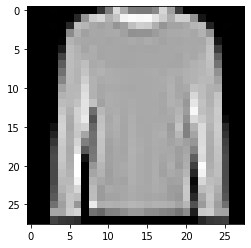

In [11]:
img = np.array(train.iloc[81,1:], dtype='int64').reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.show()

In [46]:
train_arr = np.array(train.iloc[:,:], dtype = 'float32')
test_arr = np.array(test.iloc[:,:], dtype = 'float32')

In [47]:
y_train

array([1., 2., 2., ..., 2., 9., 3.], dtype=float32)

In [48]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [49]:
x_train = train_arr[:,1:]/255
y_train = train_arr[:,0]
x_test = test_arr/255

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 random_state=48)

In [51]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)

In [52]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [53]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),
                 metrics=['accuracy'])

In [54]:
history = cnn_model.fit(
x_train,
y_train,
batch_size=512,
epochs=20,
verbose=1,
validation_data=(x_val,y_val),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 153us/step - loss: 0.7653 - accuracy: 0.7398 - val_loss: 0.4886 - val_accuracy: 0.8316
Epoch 2/20
48000/48000 [==============================] - 7s 154us/step - loss: 0.4439 - accuracy: 0.8458 - val_loss: 0.4142 - val_accuracy: 0.8577
Epoch 3/20
48000/48000 [==============================] - 7s 152us/step - loss: 0.3938 - accuracy: 0.8627 - val_loss: 0.3776 - val_accuracy: 0.8711
Epoch 4/20
48000/48000 [==============================] - 7s 154us/step - loss: 0.3539 - accuracy: 0.8784 - val_loss: 0.3719 - val_accuracy: 0.8682
Epoch 5/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.3325 - accuracy: 0.8850 - val_loss: 0.3363 - val_accuracy: 0.8822
Epoch 6/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.3207 - accuracy: 0.8883 - val_loss: 0.3286 - val_accuracy: 0.8853
Epoch 7/20
48000/48000 [==============================] - 7s 1

In [55]:
y_pred = cnn_model.predict_classes(x_test)

In [56]:
submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')
submission['label'] = y_pred
submission.to_csv('fashion_submission.csv', index = False)

In [57]:
y_test = np.array(submission, dtype ='float32')

In [37]:
fs = pd.read_csv('fashion_submission.csv', index_col = 'index')
fs

,label
index,
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
